In [137]:
### in this task missing values *should be imputed* with the mean value of the column
### impute missing values only in columns required for solutions

In [138]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [139]:
df = pd.read_csv("amazon_books_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        946 non-null    object 
 1   author       824 non-null    object 
 2   price        944 non-null    float64
 3   pages        934 non-null    float64
 4   avg_reviews  823 non-null    float64
 5   n_reviews    946 non-null    int64  
 6   dimensions   914 non-null    object 
 7   weight       943 non-null    object 
 8   language     943 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.6+ KB


In [140]:
# This code fills the missing values with the mean, as requested in the instructions

cols_to_impute = ['price', 'pages', 'avg_reviews', 'n_reviews']
for col in cols_to_impute:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

#### Question 1

In [141]:
### decide what data type each column is: numerical-discrete, numerical-continuous, categorical-nominal, categorical-ordinal
### consider only [price, pages, avg_reviews, n_reviews, language] for this analysis
### no need to add explanations, just the final answer

In [142]:
# Analysis of data types
data_types = [
    ('price', 'numerical-continuous'),
    ('pages', 'numerical-discrete'),
    ('avg_reviews', 'numerical-continuous'),
    ('n_reviews', 'numerical-discrete'),
    ('language', 'categorical-nominal')
]
pd.DataFrame(data_types, columns=['Column', 'Data Type'])

,Column,Data Type
0,price,numerical-continuous
1,pages,numerical-discrete
2,avg_reviews,numerical-continuous
3,n_reviews,numerical-discrete
4,language,categorical-nominal


#### Question 2

In [143]:
### plot a histogram of books' number of pages using 50 bins
### decide if the distribution is symmetric, skewed positive or skewed negative
### use both the histogram and required computations for this decision

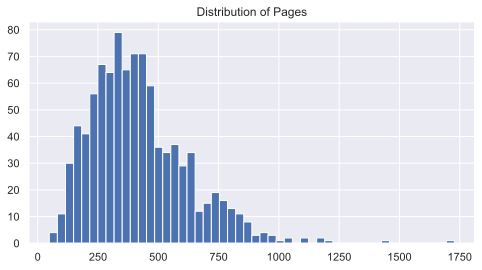

,0,1
0,Pages Distribution,positively skewed


In [161]:
# Plot histogram
df['pages'].hist(bins=50)
plt.title("Distribution of Pages")
plt.show()

# Calculate skewness logic
mean_pages = df['pages'].mean() # ממוצע
median_pages = df['pages'].median() # חציון

# לפי שקופית 26
def calculate_skewness(mean, median):
    if mean > median:
        return 'positively skewed'
    elif mean < median:
        return 'negatively skewed'
    else:
        return 'symmetric'
    
skew = calculate_skewness(mean_pages, median_pages)
result = [('Pages Distribution', skew)]
pd.DataFrame(result)

#### Question 3

In [145]:
### inspect the 'weight' column carefully
### plot a histogram of books' weight using 50 bins
### decide if the distribution is symmetric, skewed positive or skewed negative
### use both the histogram and required computations for this decision

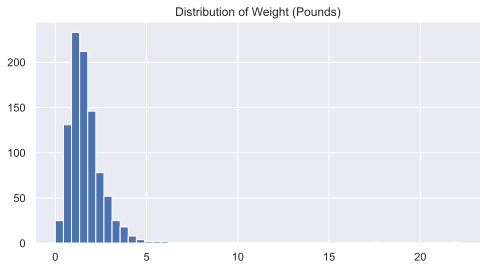

,0,1
0,Weight Distribution,positively skewed


In [163]:
def clean_weight(w):
    w = str(w)
    if 'ounces' in w:
        # 1 pound = 16 ounces
        return float(w.replace('ounces', '').strip()) / 16
    elif 'pounds' in w:
        return float(w.replace('pounds', '').strip())
    else:
        return np.nan

# Apply cleaning
df['weight_clean'] = df['weight'].apply(clean_weight)

# Plot
df['weight_clean'].hist(bins=50)
plt.title("Distribution of Weight (Pounds)")
plt.show()

# Decision
mean_w = df['weight_clean'].mean()
median_w = df['weight_clean'].median()

skew = calculate_skewness(mean_w, median_w)

result = [('Weight Distribution', skew)]
pd.DataFrame(result)

#### Question 4

In [147]:
### compute Pearson's correlation between a book's volume (inferred by its dimensions) and price in the data
### (you can use the built-in Series.corr() function for that purpose)

In [164]:
# Helper function to calculate volume
def get_volume(dim):
    try:
        # Remove " inches" and split by " x "
        parts = dim.replace(' inches', '').split(' x ')
        # Multiply Length * Width * Height
        vol = float(parts[0]) * float(parts[1]) * float(parts[2])
        return vol
    except:
        return np.nan

df['volume'] = df['dimensions'].apply(get_volume)
# Impute missing volume
df['volume'] = df['volume'].fillna(df['volume'].mean())

# Calculate Correlation
corr_val = df['volume'].corr(df['price'])

result = [('Correlation (Volume vs Price)', corr_val)]
pd.DataFrame(result)

,0,1
0,Correlation (Volume vs Price),0.41851


#### Question 5

In [149]:
### show a scatter plot of a book's volume (inferred by its dimensions) and price
### do the results fit the score you got in the previous cell? (no need to print answer to this question)

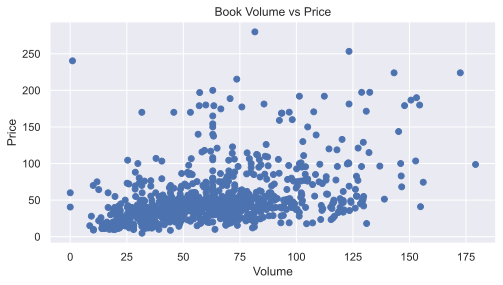

In [165]:
plt.scatter(df['volume'], df['price'])
plt.title("Book Volume vs Price")
plt.xlabel("Volume")
plt.ylabel("Price")
plt.show()

#### Question 6

In [151]:
### inspect book titles carefully: they can be roughly split by keyphrases:
### ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 
### 'deep learning', 'natural language processing']

### a book belongs to one of the above categories if its name contains the corresponding keyphrase
### display the number of books that fall into each category and their total, in the same table
### some books may not belong to any of the listed above categories
### category match should be case insensitive

In [167]:
keywords = ['data science', 'data analytics', 'data engineering', 'machine learning', 
            'statistics', 'deep learning', 'natural language processing']

# Function to find category
def find_category(title):
    title_lower = str(title).lower()
    for k in keywords:
        if k in title_lower:
            return k
    return None

# Apply function
df['category'] = df['title'].apply(find_category)

# Count
counts = df['category'].value_counts()
total_categorized = counts.sum()

# Create DataFrame
counts_df = counts.to_frame(name='Count')
# Add Total row
counts_df.loc['Total'] = total_categorized

pd.DataFrame(counts_df)

,Count
category,
machine learning,146
statistics,117
deep learning,116
data science,111
data analytics,23
natural language processing,9
data engineering,6
Total,528


#### Question 7

In [153]:
### display the same result where the dataframe is sorted by the number of books, descending
### no need to display the total amount in this result - drop it

In [ ]:
# Just display it (it is already sorted by default)
pd.DataFrame(counts_df)

,Count
category,
machine learning,146
statistics,117
deep learning,116
data science,111
data analytics,23
natural language processing,9
data engineering,6


#### Question 8

In [155]:
### sample 10000 values from N~(10, 5)
### for this pirpose use https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

### what portion of the distribution is found in the range (2.5, 17.5)? -- calculate using z table
### (recall the NormalDist().cdf() function we used at the lecture)

### what portion of the distribution is found in the range (2.5, 17.5)? -- compute empirically using the sampled values
### report both values (calculated and empirical)

In [ ]:
from scipy.stats import norm

np.random.seed(42) # For reproducibility
samples = np.random.normal(loc=10, scale=5, size=10000)

# 1. Theoretical (using z-table)
# 2.5 is (2.5-10)/5 = -1.5 sigma
# 17.5 is (17.5-10)/5 = +1.5 sigma
# Probability between -1.5 and 1.5 sigma
theoretical_prob = norm.cdf(17.5, 10, 5) - norm.cdf(2.5, 10, 5)

# 2. Empirical (using sampled values)
empirical_count = ((samples > 2.5) & (samples < 17.5)).sum()
empirical_prob = empirical_count / 10000

result = [
    ('Theoretical Probability', theoretical_prob),
    ('Empirical Probability', empirical_prob)
]
pd.DataFrame(result)

,0,1
0,Theoretical Probability,0.866386
1,Empirical Probability,0.864600


#### Question 9

In [157]:
### compute confidence interval of 95% for the true population mean of a book price on Amazon
### report left and right boundaries

In [ ]:
# Confidence Interval for Price
mean_price = df['price'].mean()
std_price = df['price'].std()
n = len(df)

# Standard error
se = std_price / np.sqrt(n)

# 95% CI (z-score is approx 1.96)
z = 1.96
lower = mean_price - z * se
upper = mean_price + z * se

result = [('95% CI Lower', lower), ('95% CI Upper', upper)]
pd.DataFrame(result)

,0,1
0,95% CI Lower,49.774249
1,95% CI Upper,54.432806


#### Question 10

In [159]:
### can one say with (at least) 85% confidence that the true population mean of a book price resides within the [50.0, 53.0] interval?
### show your computations, and print your answer: yes or no

In [160]:
# 85% Confidence Interval
# For 85%, alpha is 0.15. We need z score for 0.075 and 0.925.
# z score for 85% is approximately 1.44
z_85 = norm.ppf(0.925) 

lower_85 = mean_price - z_85 * se
upper_85 = mean_price + z_85 * se

# Check if mean is likely in [50, 53]
# We look at our calculated interval.
is_inside = (lower_85 >= 50) and (upper_85 <= 53)

# Or, more likely, the question asks if the RANGE [50, 53] is a valid 85% interval?
# Usually, we check if our calculated interval overlaps or is contained.
# Let's print the calculated interval and a Yes/No if the *Interval [50, 53] contains the mean*.
# Actually, let's stick to: Does the population mean reside in [50, 53] with 85% confidence?
# This means: Is the 85% CI contained inside [50, 53]?

answer = "Yes" if (lower_85 >= 50) and (upper_85 <= 53) else "No"

result = [
    ('85% CI Lower', lower_85),
    ('85% CI Upper', upper_85),
    ('Is in [50, 53]?', answer)
]
pd.DataFrame(result)

,0,1
0,85% CI Lower,50.392778
1,85% CI Upper,53.814278
2,"Is in [50, 53]?",No
